In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   RI                                      214 non-null    float64
 1   Na                                      214 non-null    float64
 2   Mg                                      214 non-null    float64
 3   Al                                      214 non-null    float64
 4   Si                                      214 non-null    float64
 5   K                                       214 non-null    float64
 6   Ca                                      214 non-null    float64
 7   Ba                                      214 non-null    float64
 8   Fe                                      214 non-null    float64
 9   Type: Type of glass: (class attribute)  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None
           

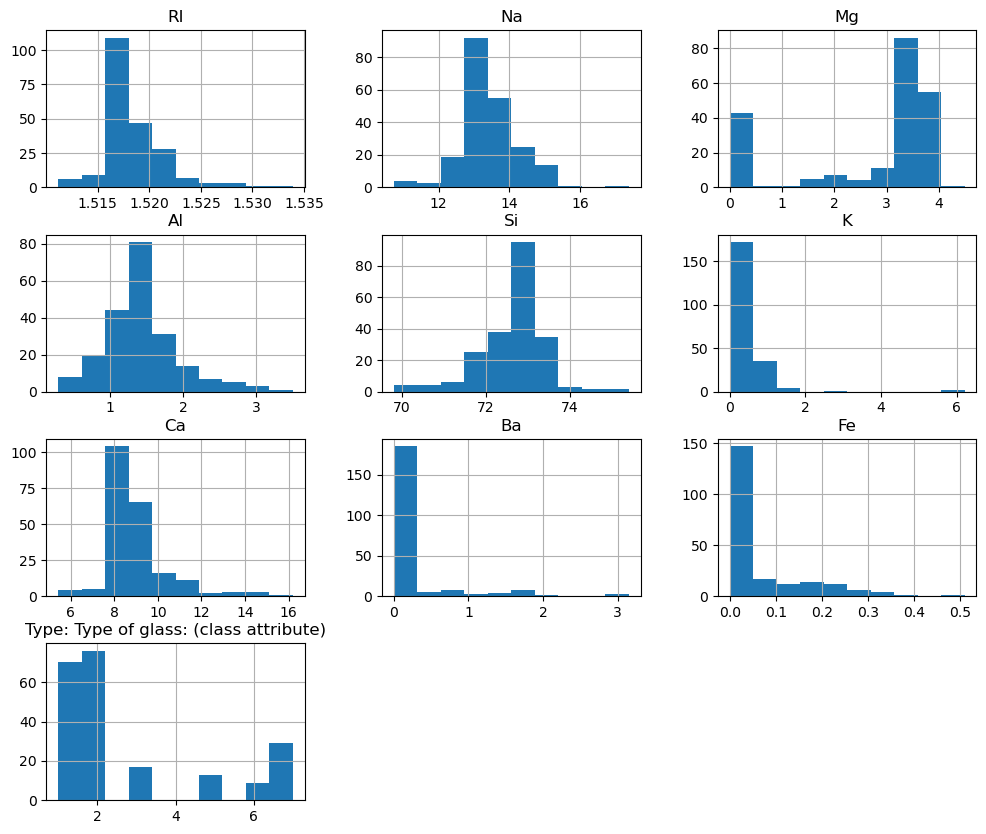

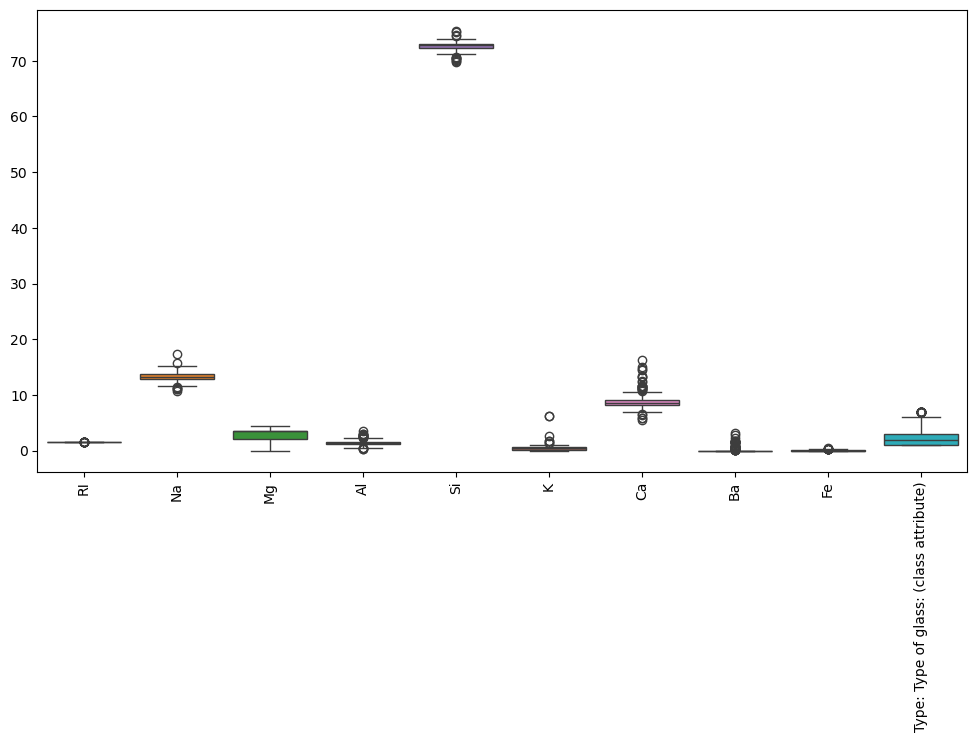

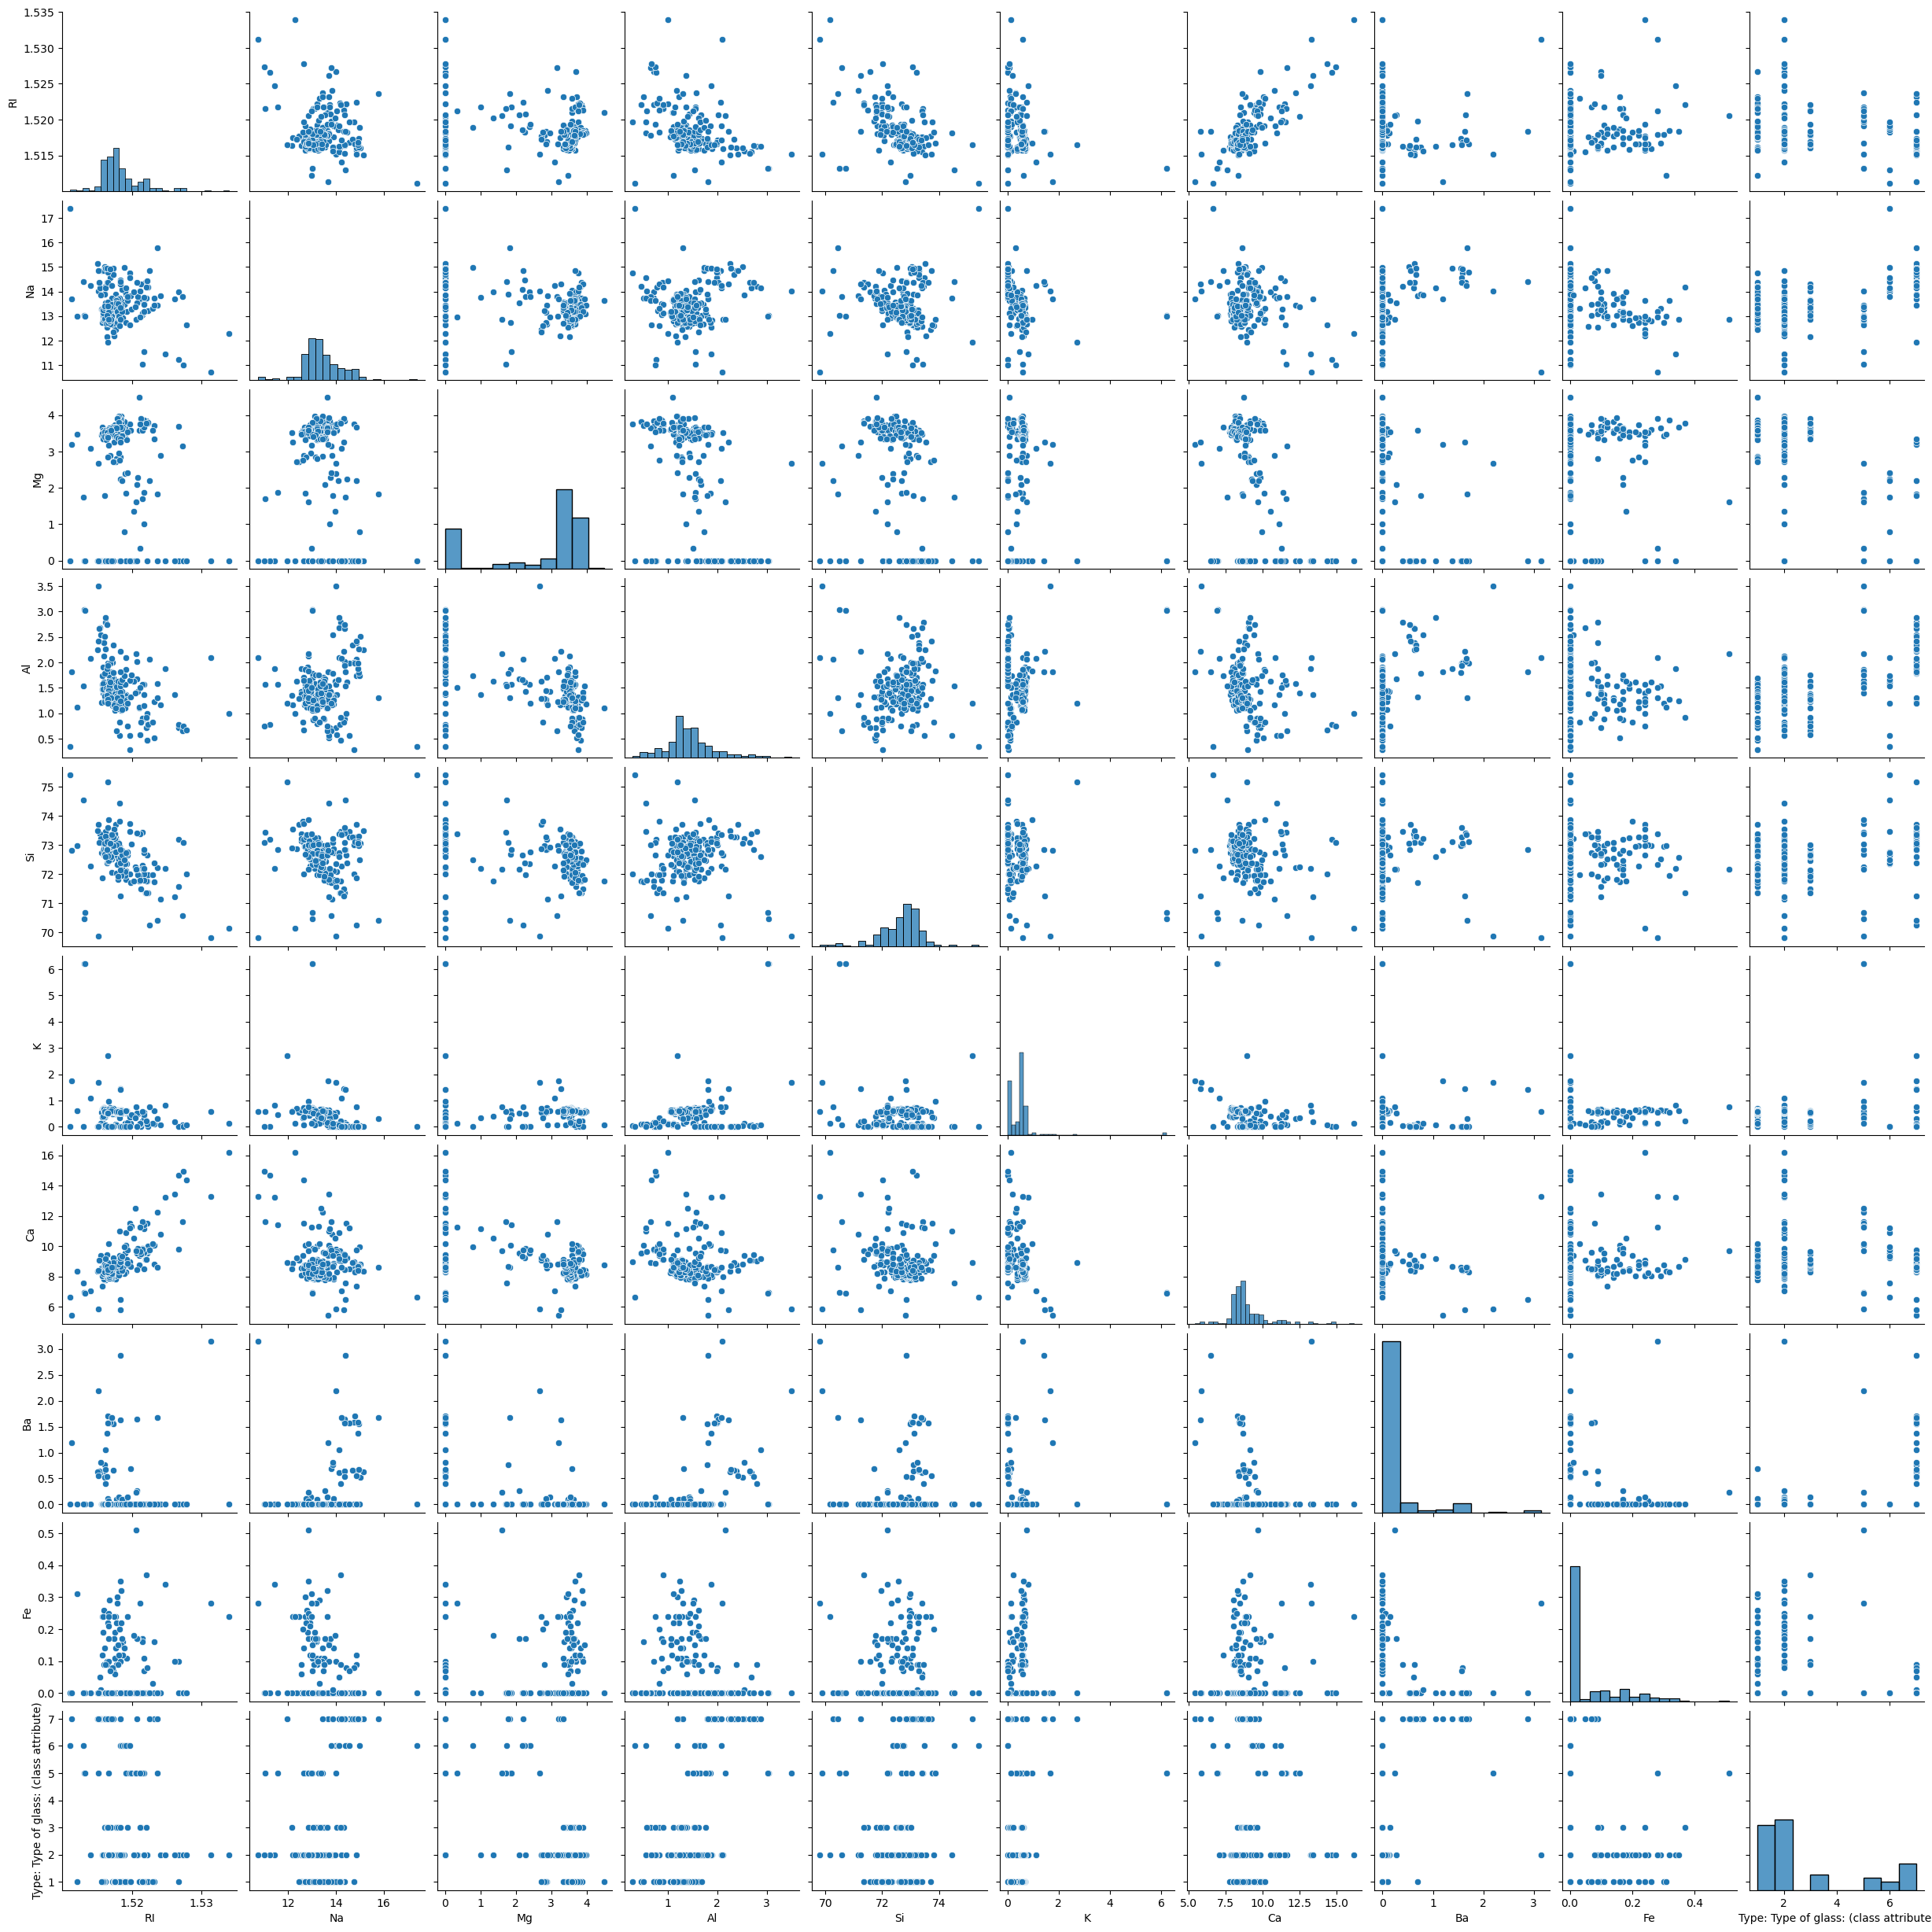

Random Forest Model Performance:
Accuracy: 0.7692307692307693
Precision: 0.7661700618222356
Recall: 0.7692307692307693
F1-Score: 0.7601294829201807


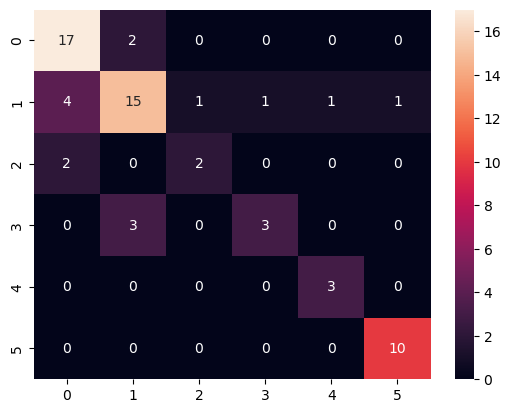

AdaBoost Model Performance:
Accuracy: 0.5076923076923077
Precision: 0.4666666666666667
Recall: 0.5076923076923077
F1-Score: 0.4460705960705961


C:\Users\Omkar\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Omkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
file_path = 'glass.xlsx'
df = pd.read_excel(file_path)

# 1. Exploratory Data Analysis (EDA)
print(df.info())  # Basic info about the dataset
print(df.describe())  # Summary statistics for numerical columns

# Print column names to identify the target column
print("Columns in the dataset:", df.columns)

# Set the correct target column name after reviewing the printed columns
# Example: If the target column is named 'GlassType', set it as the target
target_column = 'Type: Type of glass: (class attribute)'  # Adjust according to the actual target column name

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# 2. Data Visualization

# Filter numeric columns only for histograms
numeric_cols = df.select_dtypes(include=[np.number]).columns

if len(numeric_cols) > 0:
    df[numeric_cols].hist(figsize=(12, 10))
    plt.show()
else:
    print("No numeric columns to plot.")

# Box plots for numeric columns
if len(numeric_cols) > 0:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[numeric_cols])
    plt.xticks(rotation=90)
    plt.show()
else:
    print("No numeric columns for box plots.")

# Pair plots for numeric columns
if len(numeric_cols) > 1:  # Pair plot requires at least two columns
    sns.pairplot(df[numeric_cols])
    plt.show()
else:
    print("Not enough numeric columns for pair plots.")

# 3. Data Preprocessing
# Check for missing values and handle them (if needed, using imputation or removal)
df = df.dropna()  # You can also consider df.fillna() for imputation instead of dropping

# Verify if the target column exists
if target_column in df.columns:
    X = df.drop(columns=[target_column])  # Features
    y = df[target_column]  # Target
else:
    raise ValueError(f"Target column '{target_column}' not found in dataset.")

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Random Forest Model Implementation
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate performance
print("Random Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_rf, average='weighted'))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.show()

# 5. Bagging and Boosting Methods
# Implement AdaBoost for Boosting
ab = AdaBoostClassifier(n_estimators=100, random_state=42)
ab.fit(X_train, y_train)

# Predict
y_pred_ab = ab.predict(X_test)

# Evaluate performance
print("AdaBoost Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_ab))
print("Precision:", precision_score(y_test, y_pred_ab, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_ab, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_ab, average='weighted'))

# Explain differences between Bagging and Boosting
# Bagging (Random Forest): A method where multiple models are trained on different subsets of the data, and predictions are combined to improve overall performance. It reduces variance and avoids overfitting.
# Boosting (AdaBoost): A sequential process where each model focuses on the errors of the previous one, improving performance iteratively. It reduces bias and builds strong learners from weak ones.


## Interview Questions and Answers
## Bagging and Boosting: Ensemble Learning Techniques

# Bagging (Bootstrap Aggregating)
Bagging is an ensemble learning technique that involves creating multiple models (often decision trees) from different subsets of the original dataset. These subsets are generated by sampling with replacement, meaning the same data point can be selected multiple times. The final prediction is made by aggregating the predictions of all models, typically through voting or averaging.

Key characteristics of bagging:

Parallel: Models are trained independently.
Diversity: Different subsets create diverse models, reducing variance.
Robustness: Less sensitive to overfitting.

# Boosting
Boosting is another ensemble learning technique that iteratively builds models. Each subsequent model focuses on the errors made by the previous ones. The final prediction is a weighted combination of the predictions from all models, with more weight given to models that perform better.

Key characteristics of boosting:

Sequential: Models are trained sequentially.
Focus on errors: Each model learns from the mistakes of its predecessors.
Adaptive: Weights are adjusted to prioritize difficult instances.